# Decision Trees

## Setup
### Imports

In [33]:
import pandas as pd                                     # for dataset manipulation (DataFrames)
import numpy as np                                      # allows some mathematical operations
import matplotlib.pyplot as plt                         # library used to display graphs
import seaborn as sns                                   # more convenient visualisation library for dataframes
import time                                             # for execution time measurement

### Import `graphviz`
In order to visualize decision trees, you can use the `graphviz` library. In order to install it (in Datalore), you need to run the following commands in the terminal (Tools > Terminal):
```
sudo apt update
sudo apt-get install graphviz
```
Then, you will need to import the library in Python. Remember to add it to your environment!

If you are working locally, you can refer to [the graphviz website](https://graphviz.org/download/).

In [5]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin\\'

## Decision trees

### Importing and observing the data
Using what you've learned in the previous practicals, answer the following questions:
1. Import the iris dataset directly from `scikit-learn`.
2. Convert it to a `pandas` Dataframe. Remember to add the `target` column. ***Note**: Keep the `target` column as digits, do not replace the digits with the names. This is because machine learning algorithms prefer working with numerical values.*
3. Using the relevant graphs and functions, realize an analysis of the dataset and its features.

*[Your comments here]*

In [10]:
import sklearn.datasets
iris = sklearn.datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [16]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [17]:
df.shape

(150, 5)

In [18]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [25]:
df.target.value_counts()

0.0 50
1.0 50
2.0 50
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

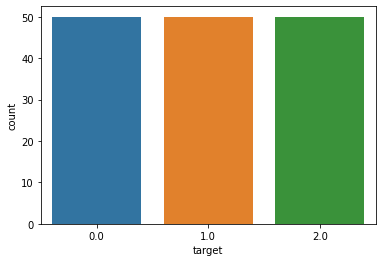

In [23]:
sns.countplot(df, x= "target", y= None, hue=None)

### Preparing the data

1. Split the data into a training and a test set with an 80-20 proportion.
2. Display the number of examples in each set.

*[Your comments here]*

In [93]:
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, cross_val_predict
# Diviser les données en ensembles d'entraînement et de test (80% train, 20% test)
X = df.drop('target', axis = 1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df.target)

In [35]:
X_train.shape

(120, 4)

In [36]:
X_test.shape

(30, 4)

In [37]:
y_train.shape

(120,)

In [38]:
y_test.shape

(30,)

In [46]:
y_train.value_counts()

0.0 40
2.0 40
1.0 40
Name: target, dtype: int64

### Training a decision tree

We will now train a decision tree on this dataset. In the following cell, import, instantiate and train a decision tree classifier.

In [94]:
# >>> from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
clf = DecisionTreeClassifier(random_state=0, max_depth=2)
clf.fit(X_train, y_train)

# Train the classifier
y_pred = clf.predict(X_test)

### Visualizing a decision tree

The `graphviz` library that we installed at the beginning of this practical can be used to visualize decision trees.
1. Complete the following code cell to display the decision tree you created above.
2. Explain the content of the blocks in the resulting graph.

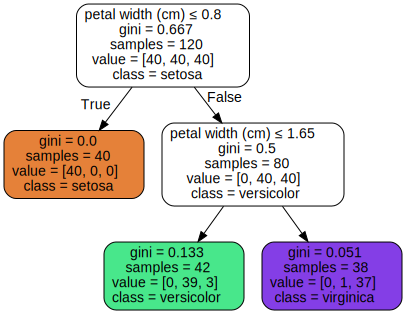

In [95]:
from sklearn.tree import export_graphviz

graph_data = export_graphviz(
    decision_tree = clf, # the decision tree you trained 
    feature_names = iris.feature_names, # the names of the features  
    class_names = iris.target_names,   # the names of the classes
    
    # the following parameters format the graph
    filled=True, 
    rounded=True,  
    special_characters=True
)

graph = graphviz.Source(graph_data)  
graph 

### Measuring the performance of the classifier

In the cells underneath, answer the following questions:
1. Measure and analyze the performance of the decision tree you have built.
2. Create and train two new decision trees: one using only sepal features, and one using only petal features.
3. Measure the performance of these new trees. Compare and comment.
4. [**Bonus**] Using the `criterion` parameter, build new decision trees using a different splitting criterion. How does it impact the performance?


In [96]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.90      0.90      0.90        10
         2.0       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [71]:
# >>> from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
clf = DecisionTreeClassifier(random_state=0, max_depth=2, criterion='entropy')
clf.fit(X_train, y_train)

# Train the classifier
y_pred = clf.predict(X_test)

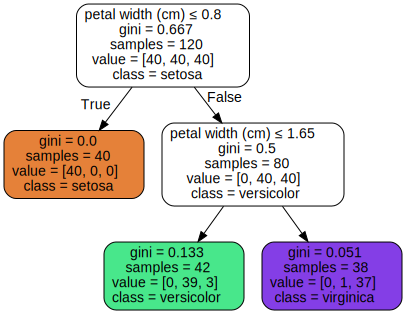

In [102]:
from sklearn.tree import export_graphviz

graph_data = export_graphviz(
    decision_tree = clf, # the decision tree you trained 
    feature_names = iris.feature_names, # the names of the features  
    class_names = iris.target_names,   # the names of the classes
    
    # the following parameters format the graph
    filled=True, 
    rounded=True,  
    special_characters=True
)

graph = graphviz.Source(graph_data)  
graph 

In [103]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier (random_state=42)
rf.fit (X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.82      0.90      0.86        10
         2.0       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, cross_val_predict
# Diviser les données en ensembles d'entraînement et de test (80% train, 20% test)
X = df.drop(['target','petal length (cm)', 'petal width (cm)'], axis = 1)
y = df.target
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df.target)

# Instantiate the classifier
clf1 = DecisionTreeClassifier(random_state=0, max_depth=2, criterion='entropy')
clf1.fit(X_train1, y_train1)

# Train the classifier
y_pred1 = clf1.predict(X_test1)

In [101]:
from sklearn.tree import export_graphviz

graph_data = export_graphviz(
    decision_tree = clf1, # the decision tree you trained 
    feature_names = iris.feature_names, # the names of the features  
    class_names = iris.target_names,   # the names of the classes
    
    # the following parameters format the graph
    filled=True, 
    rounded=True,  
    special_characters=True
)

graph = graphviz.Source(graph_data)  
graph 

ValueError: ValueError: Length of feature_names, 4 does not match number of features, 2

## Bonus questions

1. Train a random forest classifier on this same task. Try to optimize its parameters. Compare and comment on the results, as well as the pros and cons of using random forests over decision trees.
2. Refer to the documentation to find out how to get the feature importance values for each feature. How are these values computed? How do you interpret them in this case?
3. For practice, you can try to follow the same procedure using another of [`scikit-learn`'s toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html).

*[Your comments here]*

In [ ]:
# Your code here